# Machine Learning for Language Recognition

## The Actual Exercise

So, here we are: ready to start solving the problem for real.

Your task will be to edit the code for extracting the features, removing those that are not particularly useful (most of the ones that are currenlty there) and adding new features that are useful. With a little bit of imagination you will be able to reach substantialy better accuracy levels.

Some suggestions:

* The area of the code where you should work is clearly highlighted: keep the rest of the code as it is to make your life simpler.
* The confusion matrix tells you where the trouble is: use it to guide the generation of new features. If you have difficulties with French and Italian, you should compute a feature for which the two language have (intuitively) significantly different values.
* Use the current features as examples: they can really help you with writing code. If you have any problem, do not hesitate to call me.
* Googling is allowed, but make an effort to think i bit, first! That's the whole point, after all.

Here comes the entire script, the code is split in three main cells:

1. The first cell loads the data and extracts the features
2. The second cell performs normalization, categorical encoding, training and evaluation

Between the first and the second cell it may be a good idea to inspect the features that you have generated.

Whenever you change your feature set, you can just run the two cells again and obtain new results.

When you find a decently working setup, it's usually a good idea to save it somewhere: copying the text in another cell may be a simple and effective approach. 

In [2]:
# ==================================================================
# LOAD DATA AND EXTRACT FEATURES
# ==================================================================

import numpy as np
import lutil

# Load the training data
text_train, lang_train = lutil.load_lr_data('lr_train.txt')
# Load the test data
text_test, lang_test = lutil.load_lr_data('lr_test.txt')

# Notable sets of characters
common_alphabet = ['(', '«', ',', '0', '4', '8', '»', 'D', 'H', 'L', 'P', 'T', 'X', 'd', 'h', 'l', 'p', 't', 'x', u"'", '°', '3', '7', ';', '?', 'C', 'G', 'K', 'O', 'S', 'W', '[', '_', 'c', 'g', 'k', 'o', 's', 'w', '\n', '"', '*', '.', '2', '6', ':', 'B', 'F', 'J', 'N', 'R', 'V', 'Z', 'b', 'f', 'j', 'n', 'r', 'v', 'z', '!', ')', '-', '1', '5', '9', 'A', 'E', 'I', 'M', 'Q', '', 'Y', ']', 'a', 'e', 'i', 'm', 'q', '', 'y', ' ', '\t']
global_alphabet = ['(', '«', ',', '0', '4', '8', '»', 'D', 'Ç', 'H', 'L', 'P', 'T', 'X', 'd', 'ç', 'h', 'ë', 'l', 'ï', 'p', 't', 'x', 'û', u"'", '+', '/', '°', '3', '7', ';', '?', 'À', 'C', 'G', 'È', 'K', 'O', 'S', 'Ô', 'W', '[', '_', 'à', 'c', 'g', 'è', 'k', 'ì', 'o', 's', 'ô', 'w', 'ü', ' ', '\n', '"', '&', '*', '.', '2', '6', ':', 'B', 'F', 'É', 'J', 'N', 'R', 'V', 'Z', 'b', 'f', 'é', 'j', 'n', 'ñ', 'r', 'v', 'ù', 'z', '\t', '!', ')', '-', '1', '5', '9', 'º', 'A', 'Â', 'E', 'Æ', 'I', 'Ê', 'M', 'Q', '', 'Y', ']', 'a', 'â', 'e', 'æ', 'i', 'ê', 'm', 'î', 'q', 'ò', '', 'ö', 'y']
vowels = ['ë', 'û', 'À', 'È', 'O', 'Ô', 'à', 'è', 'ì', 'o', 'ô', 'ü', 'É', 'é', 'ù', 'A', 'Â', 'E', 'Æ', 'I', 'Ê', '', 'Y', 'a', 'â', 'e', 'æ', 'i', 'ê', 'î', 'ò', '', 'ö', 'y', 'ï']
consonants = ['D', 'p', 't', 'x', 'Ç', 'H', 'L', 'P', 'T', 'X', 'd', 'ç', 'h', 'l', 'C', 'G', 'K', 'S', 'W', 'c', 'g', 'k', 's', 'w', 'B', 'F', 'J', 'N', 'R', 'V', 'Z', 'b', 'f', 'j', 'n', 'ñ', 'r', 'v', 'z', 'M', 'Q', 'm', 'q', ]
numbers = ['0', '4', '8', '3', '7', '2', '6', '1', '5', '9', ]
separators = ['(', '«', ',', '»', "'", '+', '/', '°', ';', '?', '[', '_', ' ', '\n', '"', '&', '*', '.', ':', '\t', '!', ')', '-', 'º', ']', ]
separators_as_string = ''.join(separators)

# Function to extract features
def extract_features(text):
    # Prepare a data structure to store the results
    res = []
    # Loop over all pieces of text
    for lne in text:
        # PREPARE A ROW FOR THE DATASET
        row = []
        # Obtain the list of words (this is useful to extract many
        # features)
        words = [w.strip(separators_as_string) for w in lne.split()]
        words = [w for w in words if len(w) > 0]

        # ========================================================
        # THIS IS THE AREA THAT YOU SHOULD EDIT
        # ========================================================
        
        # F0: Number of words
        nwords = len(words)
        row.append(nwords)
        
        # F1: Number of characters per word
        # NOTE: float(nwords) is necessary to avoid an integer division
        ncharperword = len(lne) / float(nwords)
        row.append(ncharperword)
        
        # F2: Get number of vowels
        # NOTE: "lower()" makes the string lower case
        nvowels = len([c for c in lne if c.lower() in vowels])
        row.append(nvowels)
        
        # F3: Get the number of words starting with "p"
        nstartp = len([w for w in words if w[0] == u'p'])
        row.append(nstartp)
        
        # F4: Get number of occurences of the word "cookie"
        ncookie = len([w for w in words if w == 'cookie'])
        row.append(ncookie)
        
        # F5: Get number of occurrences of either "cookie" or "wookie"
        ncwookie = len([w for w in words if w in ['cookie', 'wookie']])
        row.append(ncwookie)
        
        # ========================================================
        # THE AREA THAT YOU SHOULD EDIT ENDS HERE
        # ========================================================
        
        # APPEND THE ROW
        res.append(row)
    # Return the result
    return np.array(res)

# EXTRACT THE FEATURES
x_train = extract_features(text_train)
x_test = extract_features(text_test)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Accuracy on the training set: 0.98
Accuracy on the test set: 0.80


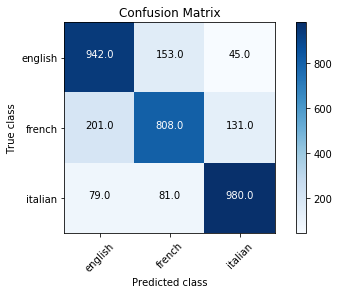

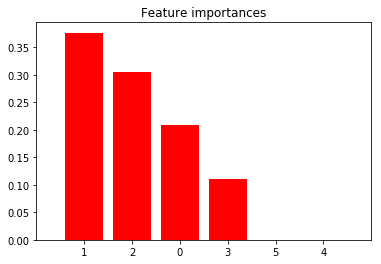

In [7]:
# ==================================================================
# PREPROCESS, TRAIN, AND EVALUATE
# ==================================================================

from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from matplotlib import pyplot as plt
import lutil


# NORMALIZE ALL FEATURES

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

# OBTAIN INTEGER CLASSES
languages = ['english', 'french', 'italian']
y_train = lutil.labels_to_int(lang_train, languages)
y_test = lutil.labels_to_int(lang_test, languages)

# Define the model
model = ensemble.RandomForestClassifier(n_estimators=50)
model.fit(x_train_norm, y_train)

p_train = model.predict(x_train_norm)
p_test = model.predict(x_test_norm)

acc_train = metrics.accuracy_score(y_train, p_train)
acc_test = metrics.accuracy_score(y_test, p_test)

print('Accuracy on the training set: %.2f' % acc_train)
print('Accuracy on the test set: %.2f' % acc_test)

# First we need to obtain the predicted classes
y_preds = model.predict(x_test_norm)

# Then we can display the confusion matrix
lutil.plot_confusion_matrix(y_test, y_preds, languages)

# Plot importance scores
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()